In [1]:
from pomegranate import *

Start by creating a distribution. For simplicity sake, we can create a very simple discrete distribution and play with it:

In [87]:
# Initialize a distribution
J = DiscreteDistribution({"yes":0.4, "no":0.6})
J

{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "yes" : 0.4,
            "no" : 0.6
        }
    ],
    "frozen" : false
}

We see this instantiated a `Distribution` object with the `parameters`. 

`pomegranate` has built in plotting functions. Given this very simple distribution, we can plot the pdf with the `.plot()` method:

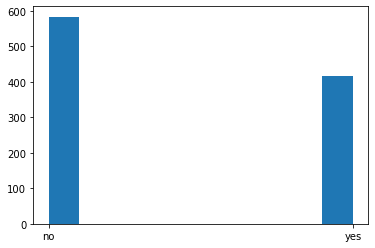

In [88]:
J.plot()

A few other useful methods:

* `sample(n)`: draw `n` samples from the distribution
* `probability(X)`: predict the probability of X under this distribution

In [89]:
J.sample(3)

array(['no', 'no', 'yes'], dtype='<U3')

In [90]:
J.probability('yes')

0.4

Let's add some more nodes and build a model to examine how we can do inference.

The procedure for creating the network is as follows:

1. Instantiate the `BayesianNetwork` model
2. Define the distributions you want to use
3. Create Node objects with these distributions and add them to the model
4. Add edges to the model with the `.add_edge(edge1, edge2)` method
5. Bake the model using the `.bake()` method

In [101]:
# 1. Instantiate the BayesianNetwork model
model = BayesianNetwork("Calculating Posterior")


# 2. Add more distributions
K = DiscreteDistribution({"yes":0.5, "no":0.5})
# Conditional Probability Table takes an argument 'table' which is a list of lists, with each inner list is a row. 
# A second argument 'parents' defines the parent distributions upon which this table depends.

M = ConditionalProbabilityTable(
    table=[['yes', 'yes', 'yes', 0.5],
           ['yes', 'yes', 'no', 0.5],
           ['yes', 'no', 'yes', 0],
           ['yes', 'no', 'no', 1],
           ['no', 'yes', 'yes', 0],
           ['no', 'yes', 'no', 1],
           ['no', 'no', 'yes', 0],
           ['no', 'no', 'no', 1]], parents=[J, K])

# 3. Define nodes in our network that follow these distributions
n1 = Node(J, name='John')
n2 = Node(K, name='Kate')
n3 = Node(M, name='Meet')
model.add_states(n1, n2, n3)

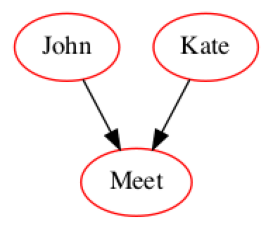

In [102]:
# 4. Define the Edges for each Node in our model
model.add_edge(n1, n3)
model.add_edge(n2, n3)

# 5. Bake the model
model.bake()

# Optional: Plot
model.plot()

## Inference

We would like to do a simple inference - what's the probability that they meet?

In [107]:
model.predict_proba({'John':'yes', 'Kate':None})

array(['yes', None, {
                        "class" : "Distribution",
                        "dtype" : "str",
                        "name" : "DiscreteDistribution",
                        "parameters" : [
                            {
                                "no" : 0.5,
                                "yes" : 0.5
                            }
                        ],
                        "frozen" : false
                    }                                   ], dtype=object)

## Impressions

It looks like it's still too early for `pomegranate` when it comes to Bayesian Networks. It felt still very much WIP to use it - documentation needs help, and the error messages have not been helpful. Better to use a different library instead.